In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
candidates = ['Biden', 'Bloomberg', 'Buttigieg', 'Klobuchar', 'Sanders', 'Steyer', 'Trump', 'Warren', 'Yang', 'Gabbard']

### Candidate Mentions - Article-Level

In [101]:
full_data = pd.read_csv('data/article_data.csv')
full_data['date'] = pd.to_datetime(full_data['date'], errors='coerce')
full_data['date'] = full_data['date'].dt.date

In [124]:
# filtering weird dates
mask = (full_data['date'].astype('str') >= "2020-03-01") & (full_data['date'].astype('str') < "2020-03-28")
full_data = full_data.loc[mask]

##### number of articles where candidate is the only one mentioned

In [103]:
one_cand = full_data.loc[full_data['candidates_mentioned'] == 1, candidates]
sum_one_cand = one_cand.sum(axis = 0, skipna = True)
sum_one_cand = sum_one_cand.to_frame(name = 'count').rename_axis('candidate').reset_index()

In [104]:
sum_one_cand

,candidate,count
0,Biden,32
1,Bloomberg,19
2,Buttigieg,0
3,Klobuchar,13
4,Sanders,39
5,Steyer,0
6,Trump,2646
7,Warren,12
8,Yang,10
9,Gabbard,0


Text(0.5, 1.0, 'Solo Candidate Mentions')

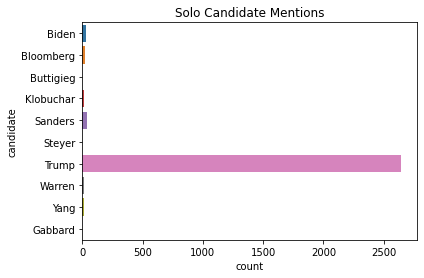

In [105]:
sns.barplot(x = 'count', y = 'candidate', data = sum_one_cand)
plt.title('Solo Candidate Mentions')

Text(0.5, 1.0, 'Solo Candidate Mentions (Democrats Only)')

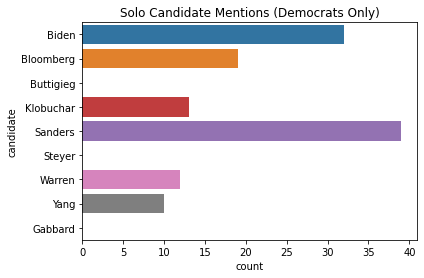

In [106]:
# without Trump
one_cand_no_trump = sum_one_cand[sum_one_cand['candidate'] != 'Trump']
sns.barplot(x = 'count', y = 'candidate', data = one_cand_no_trump)
plt.title('Solo Candidate Mentions (Democrats Only)')

##### number of articles where candidate is mentioned (perhaps along with others)

In [107]:
sum_cand_total = full_data.loc[:, candidates].sum(axis = 0, skipna = True)
sum_cand_total = sum_cand_total.to_frame(name = 'count').rename_axis('candidate').reset_index()

In [108]:
sum_cand_total

,candidate,count
0,Biden,1392
1,Bloomberg,452
2,Buttigieg,339
3,Klobuchar,410
4,Sanders,1233
5,Steyer,235
6,Trump,3957
7,Warren,537
8,Yang,292
9,Gabbard,296


Text(0.5, 1.0, 'Total Candidate Mentions')

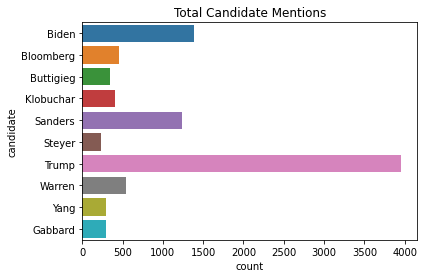

In [109]:
sns.barplot(x = 'count', y = 'candidate', data = sum_cand_total)
plt.title('Total Candidate Mentions')

Text(0.5, 1.0, 'Total Candidate Mentions (Democrats Only)')

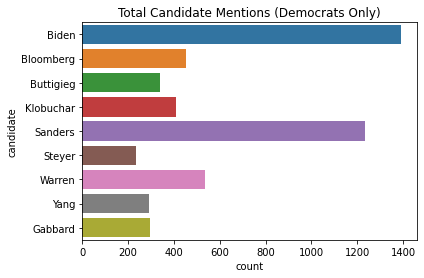

In [110]:
# without Trump
cand_total_no_trump = sum_cand_total[sum_cand_total['candidate'] != 'Trump']
sns.barplot(x = 'count', y = 'candidate', data = cand_total_no_trump)
plt.title('Total Candidate Mentions (Democrats Only)')

##### trends over time - only candidate

In [111]:
candidates.append('date')

In [112]:
one_cand_day = full_data.loc[full_data['candidates_mentioned'] == 1, candidates]

In [113]:
sum_one_cand_day = one_cand_day.groupby(['date']).sum()
sum_one_cand_day.reset_index(inplace = True)

In [114]:
sum_one_cand_day_long = pd.melt(sum_one_cand_day,
                                id_vars=['date'],
                                var_name='candidates', 
                                value_name='count')

Text(0.5, 1.0, 'Solo Candidate Mentions Over Time')

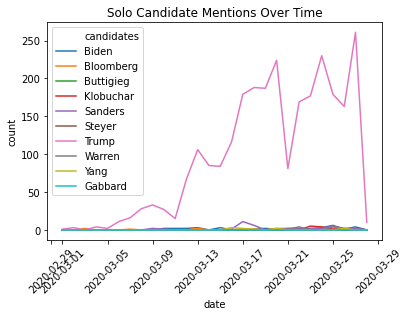

In [115]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = sum_one_cand_day_long)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Solo Candidate Mentions Over Time')

In [116]:
# without Trump
one_cand_day_no_trump = sum_one_cand_day_long[sum_one_cand_day_long['candidates'] != 'Trump']

Text(0.5, 1.0, 'Solo Candidate Mentions Over Time (Democrats Only)')

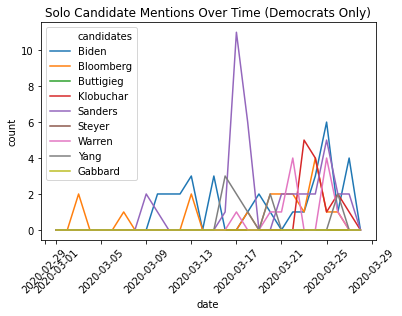

In [117]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = one_cand_day_no_trump)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Solo Candidate Mentions Over Time (Democrats Only)')

##### trends over time - candidate mentioned at all

In [118]:
cand_day = full_data.loc[:, candidates]

In [119]:
sum_cand_total_day = cand_day.groupby(['date']).sum()
sum_cand_total_day.reset_index(inplace = True)

In [120]:
sum_cand_total_day_long = pd.melt(sum_cand_total_day,
                                  id_vars=['date'],
                                  var_name='candidates', 
                                  value_name='count')

Text(0.5, 1.0, 'Total Candidate Mentions Over Time')

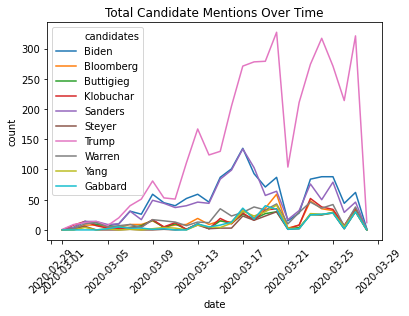

In [121]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = sum_cand_total_day_long)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Total Candidate Mentions Over Time')

In [27]:
# without Trump
cand_total_day_no_trump = sum_cand_total_day_long[sum_cand_total_day_long['candidates'] != 'Trump']

Text(0.5, 1.0, 'Total Candidate Mentions Over Time (Democrats Only)')

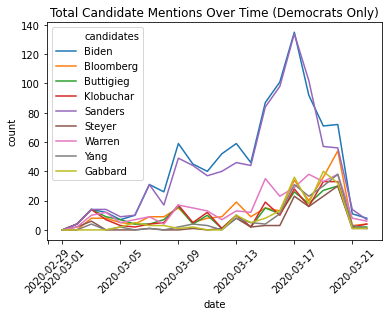

In [28]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = cand_total_day_no_trump)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Total Candidate Mentions Over Time (Democrats Only)')

### Candidate Mentions - Sentence-Level

In [66]:
sentence_data = pd.read_csv('data/sentence_data.csv')
sentence_data['date'] = pd.to_datetime(sentence_data['date'], errors='coerce')
sentence_data['date'] = sentence_data['date'].dt.date

In [67]:
# filtering weird dates
mask = (sentence_data['date'].astype('str') >= "2020-03-01") & (sentence_data['date'].astype('str') < "2020-04-03")
sentence_data = sentence_data.loc[mask]

##### number of sentences where candidate is the only one mentioned

In [68]:
one_cand = sentence_data.loc[sentence_data['candidates_mentioned'] == 1, candidates]
sum_one_cand = one_cand.sum(axis = 0, skipna = True)
sum_one_cand = sum_one_cand.to_frame(name = 'count').rename_axis('candidate').reset_index()

In [69]:
sum_one_cand

,candidate,count
0,Biden,23467
1,Bloomberg,2762
2,Buttigieg,348
3,Klobuchar,977
4,Sanders,18366
5,Steyer,25
6,Trump,72985
7,Warren,1859
8,Yang,638
9,Gabbard,805


Text(0.5, 1.0, 'Solo Candidate Mentions - Sentence-level')

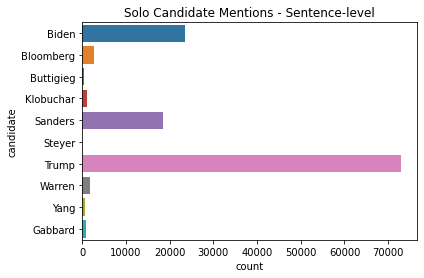

In [70]:
sns.barplot(x = 'count', y = 'candidate', data = sum_one_cand)
plt.title('Solo Candidate Mentions - Sentence-level')

Text(0.5, 1.0, 'Solo Candidate Mentions (Democrats Only) - Sentence-level')

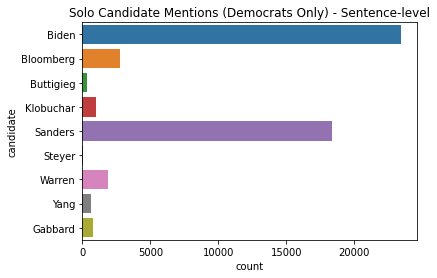

In [71]:
# without Trump
one_cand_no_trump = sum_one_cand[sum_one_cand['candidate'] != 'Trump']
sns.barplot(x = 'count', y = 'candidate', data = one_cand_no_trump)
plt.title('Solo Candidate Mentions (Democrats Only) - Sentence-level')

##### number of sentences where candidate is mentioned (perhaps along with others)

In [75]:
sum_cand_total = sentence_data.loc[:, candidates].sum(axis = 0, skipna = True)
sum_cand_total = sum_cand_total.to_frame(name = 'count').rename_axis('candidate').reset_index()

In [76]:
sum_cand_total

,candidate,count
0,Biden,38054
1,Bloomberg,3675
2,Buttigieg,1015
3,Klobuchar,1838
4,Sanders,29500
5,Steyer,93
6,Trump,79125
7,Warren,3412
8,Yang,835
9,Gabbard,1011


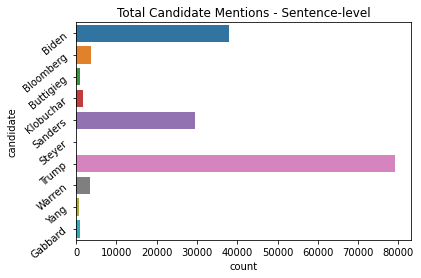

In [77]:
chart = sns.barplot(x = 'count', y = 'candidate', data = sum_cand_total)
plt.setp(chart.get_yticklabels(), rotation = 40)
plt.title('Total Candidate Mentions - Sentence-level')
plt.savefig('figures/total_trump.png', dpi = 400)

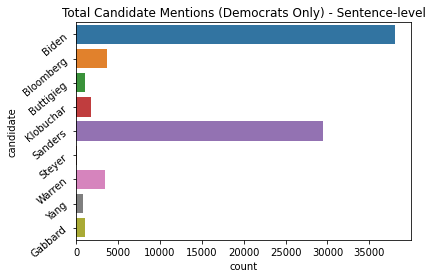

In [88]:
# without Trump
cand_total_no_trump = sum_cand_total[sum_cand_total['candidate'] != 'Trump']
chart = sns.barplot(x = 'count', y = 'candidate', data = cand_total_no_trump)
plt.setp(chart.get_yticklabels(), rotation = 40)
plt.title('Total Candidate Mentions (Democrats Only) - Sentence-level')
plt.savefig('total_dems.png', dpi = 400)

##### trends over time - only candidate

In [78]:
one_cand_day = sentence_data.loc[sentence_data['candidates_mentioned'] == 1]

In [79]:
one_cand_day = one_cand_day[['date', 'Trump', 'Sanders', 'Biden', 'Warren', 'Buttigieg', 'Bloomberg', 'Klobuchar', 'Yang', 'Steyer', 'Gabbard']]

In [80]:
sum_one_cand_day = one_cand_day.groupby(['date']).sum()
sum_one_cand_day.reset_index(inplace = True)

In [81]:
sum_one_cand_day_long = pd.melt(sum_one_cand_day,
                                id_vars=['date'],
                                var_name='candidates', 
                                value_name='count')

Text(0.5, 1.0, 'Solo Candidate Mentions Over Time - Sentence-level')

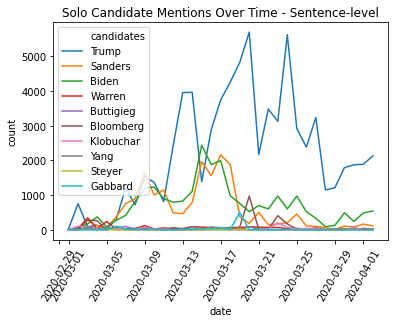

In [82]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = sum_one_cand_day_long)
plt.setp(chart.get_xticklabels(), rotation = 60)
plt.title('Solo Candidate Mentions Over Time - Sentence-level')

In [56]:
# without Trump
one_cand_day_no_trump = sum_one_cand_day_long[sum_one_cand_day_long['candidates'] != 'Trump']

Text(0.5, 1.0, 'Solo Candidate Mentions Over Time (Democrats Only) \nSentence-level')

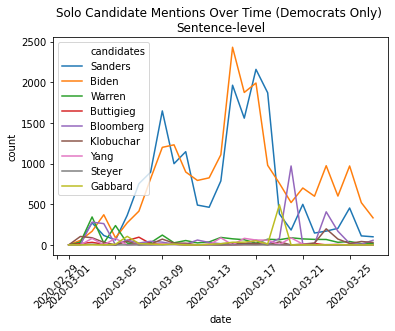

In [57]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = one_cand_day_no_trump)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Solo Candidate Mentions Over Time (Democrats Only) \nSentence-level')

##### trends over time - candidate mentioned at all

In [83]:
cand_day = sentence_data[['date', 'Trump', 'Sanders', 'Biden', 'Warren', 'Buttigieg', 'Bloomberg', 'Klobuchar', 'Yang', 'Steyer', 'Gabbard']]

In [84]:
sum_cand_total_day = cand_day.groupby(['date']).sum()
sum_cand_total_day.reset_index(inplace = True)

In [85]:
sum_cand_total_day_long = pd.melt(sum_cand_total_day,
                                  id_vars=['date'],
                                  var_name='candidates', 
                                  value_name='count')

In [90]:
from matplotlib.dates import DateFormatter

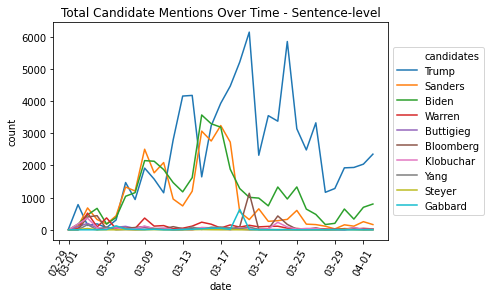

In [96]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = sum_cand_total_day_long)
plt.setp(chart.get_xticklabels(), rotation = 60)
plt.title('Total Candidate Mentions Over Time - Sentence-level')
chart.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
date_form = DateFormatter("%m-%d")
chart.xaxis.set_major_formatter(date_form)
plt.savefig('mentions_time_trump.png', dpi = 400, bbox_inches = 'tight')

In [97]:
# without Trump
cand_total_day_no_trump = sum_cand_total_day_long[sum_cand_total_day_long['candidates'] != 'Trump']

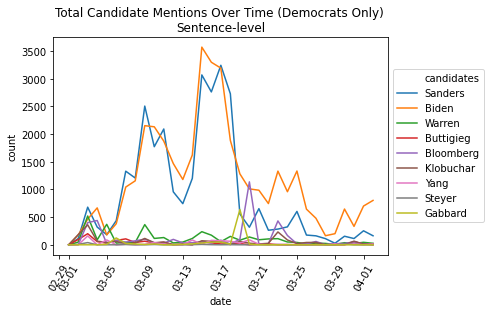

In [99]:
chart = sns.lineplot(x = 'date', y = 'count', hue = 'candidates', data = cand_total_day_no_trump)
plt.setp(chart.get_xticklabels(), rotation = 60)
plt.title('Total Candidate Mentions Over Time (Democrats Only) \nSentence-level')
chart.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
date_form = DateFormatter("%m-%d")
chart.xaxis.set_major_formatter(date_form)
plt.savefig('mentions_time_dems.png', dpi = 400, bbox_inches = 'tight')